In [1]:
#!pip install tensorflow

In [2]:
from Hopper import *
import tensorflow as tf
import numpy as np
import Prepper

import matplotlib.pyplot as plt
%matplotlib inline

# Hopper

In [3]:
verbose = True
h = dbms(verbose=verbose)

DROP TABLE IF EXISTS i_ids;

CREATE TABLE i_ids (
	i_id TEXT NOT NULL,
	PRIMARY KEY (i_id)
);

DROP TABLE IF EXISTS i_windows;

CREATE TABLE i_windows (
	i_id TEXT NOT NULL,
	i_st INTEGER NOT NULL,
	i_et INTEGER NOT NULL,
	PRIMARY KEY (i_id),
	FOREIGN KEY (i_id) REFERENCES i_ids (i_id)
);

DROP TABLE IF EXISTS i_partitions;

CREATE TABLE i_partitions (
	i_id TEXT NOT NULL,
	partition TEXT NOT NULL,
	PRIMARY KEY (i_id),
	FOREIGN KEY (i_id) REFERENCES i_ids (i_id)
);

DROP TABLE IF EXISTS i_relcal;

CREATE TABLE i_relcal (
	i_id TEXT NOT NULL,
	i_st INTEGER NOT NULL,
	i_et INTEGER NOT NULL
);



## Load Tables

In [4]:
_tc = table_config("characteristics_0", 
                  ["age", "sex", "eth", "bin_ldc", "job"], 
                  ["real", "bin", "ldc", "ldc", "hdc"],
                  has_times=False,
                  primary_key=True)
h.create_fvm_with_csv(_tc, "data/characteristics_0.csv", delimiter=',')


_tc = table_config("samples_0", 
                  ["SBP", "DBP", "type"], 
                  ["real", "real", "ldc"], 
                  has_times=True,
                  primary_key=False)
h.create_fvm_with_csv(_tc, "data/samples_0.csv", delimiter=',')



_tc = table_config("samples_1", 
                  ["tmps", "hrs", "sbps", "rrs", "dbps", "sats", "wgts"],
                  ["real", "real", 'real', "real", "real", "real", "real"], 
                  has_times=True,
                  primary_key=False)
h.create_fvm_with_csv(_tc, "data/samples_1.csv", delimiter=',')


_tc = table_config("samples_2", 
                  ["dx"],
                  ["hdc"], 
                  has_times=True,
                  primary_key=False)
h.create_fvm_with_csv(_tc, "data/samples_2.csv", delimiter=',')



_tc = table_config("samples_3", 
                  ["outcome"],
                  ["bin"], 
                  has_times=True,
                  primary_key=False)
h.create_fvm_with_csv(_tc, "data/samples_3.csv", delimiter=',')


_tc = table_config("samples_4", 
                  ["q"],
                  ["bin"], 
                  has_times=True,
                  primary_key=False)
h.create_fvm_with_csv(_tc, "data/samples_4.csv", delimiter=',')


DROP TABLE IF EXISTS characteristics_0;

CREATE TABLE characteristics_0 (
	i_id TEXT NOT NULL,
	age REAL NOT NULL,
	sex TEXT NOT NULL,
	eth TEXT NOT NULL,
	bin_ldc TEXT NOT NULL,
	job TEXT NOT NULL,
	PRIMARY KEY (i_id),
	FOREIGN KEY (i_id) REFERENCES i_ids (i_id)
);

INSERT OR IGNORE INTO i_ids (i_id) VALUES (?);

INSERT  INTO characteristics_0 (i_id, age, sex, eth, bin_ldc, job) VALUES (?, ?, ?, ?, ?, ?);

CREATE INDEX i_index_characteristics_0_i_id ON characteristics_0(i_id);

CREATE INDEX i_index_characteristics_0_age ON characteristics_0(age);

CREATE INDEX i_index_characteristics_0_sex ON characteristics_0(sex);

CREATE INDEX i_index_characteristics_0_eth ON characteristics_0(eth);

CREATE INDEX i_index_characteristics_0_bin_ldc ON characteristics_0(bin_ldc);

CREATE INDEX i_index_characteristics_0_job ON characteristics_0(job);

10000 rows loaded

DROP TABLE IF EXISTS samples_0;

CREATE TABLE samples_0 (
	i_id TEXT NOT NULL,
	i_st INTEGER NOT NULL,
	i_et INTEGER NOT NULL,
	SBP RE

## Window, Filter, Transform, Aggregate, Normalize Data

In [5]:
#h.dew_it(after_first=35)
h.dew_it(fit_normalization_via_sql_qds=False)

INSERT  INTO i_windows (i_id, i_st, i_et) VALUES (?, ?, ?);

gen_range_table_sql called: af=None, bf=None
INSERT OR IGNORE INTO i_windows 
SELECT * FROM (
	SELECT i_id, MIN(i_st) AS i_st, MAX(i_et) AS i_et
	FROM (
	    SELECT i_id, i_st, i_et
		FROM samples_0
		UNION
			SELECT i_id, i_st, i_et
		FROM samples_1
		UNION
			SELECT i_id, i_st, i_et
		FROM samples_2
		UNION
			SELECT i_id, i_st, i_et
		FROM samples_3
		UNION
			SELECT i_id, i_st, i_et
		FROM samples_4
		
	)
	GROUP BY i_id
);

INSERT  INTO i_partitions (i_id, partition) VALUES (?, ?);

INSERT OR IGNORE INTO i_partitions 
SELECT * FROM (
	SELECT i_id, CASE 
		 WHEN r <= 0.8 THEN "train" 
		 WHEN r <= 0.9 THEN "dev" 
		 WHEN r <= 1.0 THEN "test" 
		 ELSE "test" 
	END
	FROM (SELECT i_id, ABS(RANDOM())/(9223372036854775807.0) AS r FROM i_ids)
);

CREATE VIEW win_samples_0 AS
    SELECT samples_0.i_id,
	MAX(samples_0.i_st, i_windows.i_st) AS i_st,
	MIN(samples_0.i_et, i_windows.i_et) AS i_et,
	SBP,
	DBP,
	type
	FROM (
	    sample

SELECT AVG(sats) AS avg,
       SUM((sats-(SELECT AVG(sats) FROM i_partitions_train_win_samples_1))*
       (sats-(SELECT AVG(sats) FROM i_partitions_train_win_samples_1)))
       /(COUNT(sats)-1) AS var
FROM i_partitions_train_win_samples_1
;

SELECT AVG(wgts) AS avg,
       SUM((wgts-(SELECT AVG(wgts) FROM i_partitions_train_win_samples_1))*
       (wgts-(SELECT AVG(wgts) FROM i_partitions_train_win_samples_1)))
       /(COUNT(wgts)-1) AS var
FROM i_partitions_train_win_samples_1
;

SELECT COUNT(*) FROM i_partitions_train_win_samples_2;

SELECT dx, COUNT(*) AS n
FROM i_partitions_train_win_samples_2
GROUP BY dx
ORDER BY n DESC
;


SELECT COUNT(*) FROM i_partitions_train_win_samples_3;

SELECT outcome, COUNT(*) AS n
FROM i_partitions_train_win_samples_3
GROUP BY outcome
ORDER BY n DESC
;


SELECT COUNT(*) FROM i_partitions_train_win_samples_4;

SELECT q, COUNT(*) AS n
FROM i_partitions_train_win_samples_4
GROUP BY q
ORDER BY n DESC
;


SELECT min(i_st) AS i_st, max(i_et) AS i_et
FROM 

SELECT avg_tmps, min_tmps, max_tmps, avg_hrs, min_hrs, max_hrs, avg_sbps, min_sbps, max_sbps, avg_rrs, min_rrs, max_rrs, avg_dbps, min_dbps, max_dbps, avg_sats, min_sats, max_sats, avg_wgts, min_wgts, max_wgts, count
FROM agg_samples_1
;

SELECT count
FROM agg_samples_2
;

SELECT count
FROM agg_samples_3
;

SELECT count
FROM agg_samples_4
;

CREATE VIEW nrm_characteristics_0 AS
    SELECT i_id,
	(age-45.0078)/10.0118998776456 as age,
	sex,
	eth_e0,
	eth_e1,
	eth_e2,
	eth_e3,
	eth_e4,
	eth_e5,
	eth__OTHER_,
	bin_ldc_A,
	bin_ldc_B,
	bin_ldc__OTHER_,
	job
	FROM ohe_characteristics_0
	
;

CREATE VIEW nrm_samples_0 AS
    SELECT i_id,
	i_st,
	i_et,
	(avg_SBP-120.01870463430774)/4.389547935701271 as avg_SBP,
	(min_SBP-118.71426970598165)/4.895604955181803 as min_SBP,
	(max_SBP-121.32253046595892)/4.88190848684174 as max_SBP,
	(avg_DBP-80.00029584321649)/4.376294576255876 as avg_DBP,
	(min_DBP-78.69548528987258)/4.880470327159162 as min_DBP,
	(max_DBP-81.30708128189131)/4.879608140492568 as m

# Prepper 

In [6]:
tfp = Prepper.tf_prepper(h)
tfp.features

['i_id',
 'i_duration',
 'characteristics_0/age',
 'characteristics_0/sex',
 'characteristics_0/eth_e0',
 'characteristics_0/eth_e1',
 'characteristics_0/eth_e2',
 'characteristics_0/eth_e3',
 'characteristics_0/eth_e4',
 'characteristics_0/eth_e5',
 'characteristics_0/eth__OTHER_',
 'characteristics_0/bin_ldc_A',
 'characteristics_0/bin_ldc_B',
 'characteristics_0/bin_ldc__OTHER_',
 'characteristics_0/job',
 'samples_0/avg_SBP',
 'samples_0/min_SBP',
 'samples_0/max_SBP',
 'samples_0/avg_DBP',
 'samples_0/min_DBP',
 'samples_0/max_DBP',
 'samples_0/avg_type_c0',
 'samples_0/avg_type_c1',
 'samples_0/avg_type_c2',
 'samples_0/avg_type_c3',
 'samples_0/avg_type_c4',
 'samples_0/avg_type__OTHER_',
 'samples_0/count',
 'samples_1/avg_tmps',
 'samples_1/min_tmps',
 'samples_1/max_tmps',
 'samples_1/avg_hrs',
 'samples_1/min_hrs',
 'samples_1/max_hrs',
 'samples_1/avg_sbps',
 'samples_1/min_sbps',
 'samples_1/max_sbps',
 'samples_1/avg_rrs',
 'samples_1/min_rrs',
 'samples_1/max_rrs',
 'sam

## Fit Prepper to Desired Task

In [7]:
tfp.fit(offsets=[0, 1, 2, 4, 5], label_fns=["samples_3/avg_outcome", ], partition="train")

SELECT job
FROM i_partitions_train_nrm_characteristics_0
;

SELECT concat_dx
FROM i_partitions_train_nrm_samples_2
;



## Make Models

In [8]:
models = {}

In [9]:
d0 = tf.keras.layers.Dense(units=32, name="encode")
r0 = tf.keras.layers.LSTM(units=32,return_sequences=True, name="RNN_0")
r1 = tf.keras.layers.LSTM(units=16,return_sequences=True, name="RNN_1")

models["all"] = tfp.build_model(middle_layer_list=[d0, r0, r1])
models["all"].compile(loss="binary_crossentropy")
models["all"].summary()

Model: "final"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
characteristics_0/job (InputLay [(None, None, 1)]    0                                            
__________________________________________________________________________________________________
samples_2/concat_dx (InputLayer [(None, None, 5)]    0                                            
__________________________________________________________________________________________________
emb_characteristics_0/job (Embe (None, None, 1, 6)   4776        characteristics_0/job[0][0]      
__________________________________________________________________________________________________
emb_samples_2/concat_dx (Embedd (None, None, 5, 10)  81030       samples_2/concat_dx[0][0]        
______________________________________________________________________________________________

In [10]:
d0 = tf.keras.layers.Dense(units=32, name="encode")
r0 = tf.keras.layers.LSTM(units=32,return_sequences=True, name="RNN_0")
r1 = tf.keras.layers.LSTM(units=16,return_sequences=True, name="RNN_1")

models["noWS"] = tfp.build_model(middle_layer_list=[d0, r0, r1], ignore_fns=['samples_4/avg_q', 'samples_4/count'])
models["noWS"].compile(loss="binary_crossentropy")
models["noWS"].summary()

Model: "final"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
characteristics_0/job (InputLay [(None, None, 1)]    0                                            
__________________________________________________________________________________________________
samples_2/concat_dx (InputLayer [(None, None, 5)]    0                                            
__________________________________________________________________________________________________
emb_characteristics_0/job (Embe (None, None, 1, 6)   4776        characteristics_0/job[0][0]      
__________________________________________________________________________________________________
emb_samples_2/concat_dx (Embedd (None, None, 5, 10)  81030       samples_2/concat_dx[0][0]        
______________________________________________________________________________________________

## Make TensorFlow Dataset

In [11]:
ds = tfp.transform_to_ds()

SELECT *
FROM i_windows
;

SELECT *
FROM nrm_characteristics_0
;

SELECT *
FROM nrm_samples_0
;

SELECT *
FROM nrm_samples_1
;

SELECT *
FROM nrm_samples_2
;

SELECT *
FROM nrm_samples_3
;

SELECT *
FROM nrm_samples_4
;

SELECT *
FROM i_partitions
;



# Train Model

In [12]:
models["all"].fit(ds["train"], epochs=1, validation_data=ds["dev"])
#final_model.fit(ds["test"], epochs=1)

125/125 [==============================] - 108s 868ms/step - loss: 0.4497 - val_loss: 0.2954


In [13]:
models["noWS"].fit(ds["train"], epochs=1, validation_data=ds["dev"])
#final_wo_model.fit(ds["test"], epochs=1)

125/125 [==============================] - 107s 859ms/step - loss: 0.4495 - val_loss: 0.2954


# Examine Individual Trajectories

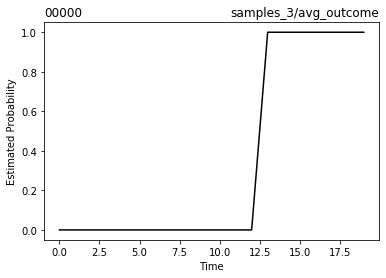

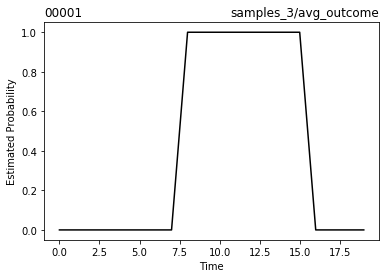

In [14]:
for idx in ["00000", "00001"]:
    e = Prepper.entity(idx, tfp)
    e.plot()

00000
all


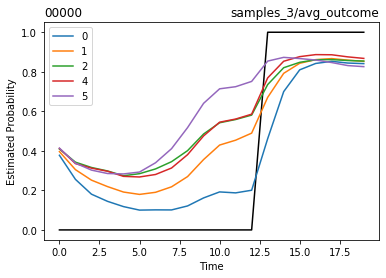

noWS


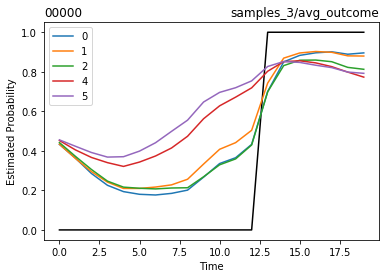

00001
all


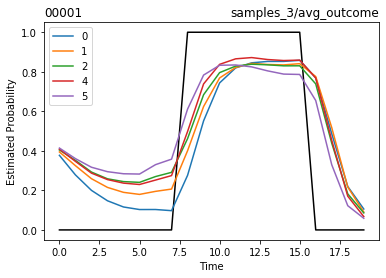

noWS


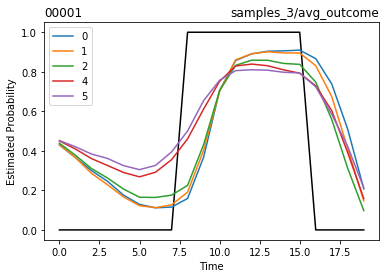

In [15]:
for idx in ["00000", "00001"]:
    e = Prepper.entity(idx, tfp)
    print(idx)
    for model_name, model in models.items():
        print(model_name)
        e.predict(model)
        e.plot()

# Operating Characteristics

In [16]:
partitions = ["train", "dev", "test"]
pop_res = {partition: {} for partition in partitions}

for partition in partitions:
    for model_name, model in models.items():
        print(partition, model_name)
        pop_res[partition][model_name] = \
        Prepper.population(ds[partition], tfp, model)

train all
Done: 125
samples_3/avg_outcome 0 - mean label: 0.472, pred: 0.473
samples_3/avg_outcome 1 - mean label: 0.494, pred: 0.534
samples_3/avg_outcome 2 - mean label: 0.514, pred: 0.565
samples_3/avg_outcome 4 - mean label: 0.547, pred: 0.570
samples_3/avg_outcome 5 - mean label: 0.560, pred: 0.578
train noWS
Done: 125
samples_3/avg_outcome 0 - mean label: 0.472, pred: 0.528
samples_3/avg_outcome 1 - mean label: 0.494, pred: 0.531
samples_3/avg_outcome 2 - mean label: 0.514, pred: 0.520
samples_3/avg_outcome 4 - mean label: 0.547, pred: 0.546
samples_3/avg_outcome 5 - mean label: 0.560, pred: 0.583
dev all
Done: 29
samples_3/avg_outcome 0 - mean label: 0.483, pred: 0.481
samples_3/avg_outcome 1 - mean label: 0.506, pred: 0.543
samples_3/avg_outcome 2 - mean label: 0.527, pred: 0.574
samples_3/avg_outcome 4 - mean label: 0.563, pred: 0.579
samples_3/avg_outcome 5 - mean label: 0.578, pred: 0.587
dev noWS
Done: 29
samples_3/avg_outcome 0 - mean label: 0.483, pred: 0.536
samples_3/av

# Train

all


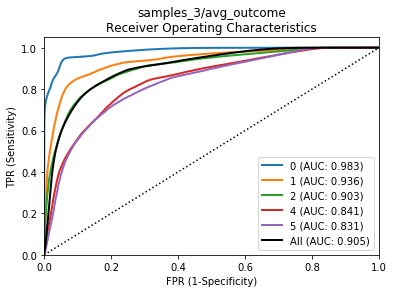

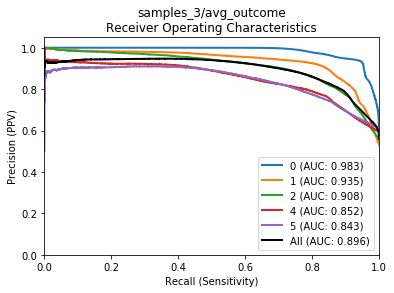

samples_3/avg_outcome (0)
	Brier: 0.070
	Precision: 0.945
	Recall: 0.916
	F1: 0.930

samples_3/avg_outcome (1)
	Brier: 0.114
	Precision: 0.833
	Recall: 0.900
	F1: 0.865

samples_3/avg_outcome (2)
	Brier: 0.138
	Precision: 0.793
	Recall: 0.882
	F1: 0.835

samples_3/avg_outcome (4)
	Brier: 0.161
	Precision: 0.783
	Recall: 0.812
	F1: 0.797

samples_3/avg_outcome (5)
	Brier: 0.167
	Precision: 0.759
	Recall: 0.825
	F1: 0.791

samples_3/avg_outcome (All)
	Brier: 0.130
	Precision: 0.816
	Recall: 0.864
	F1: 0.840



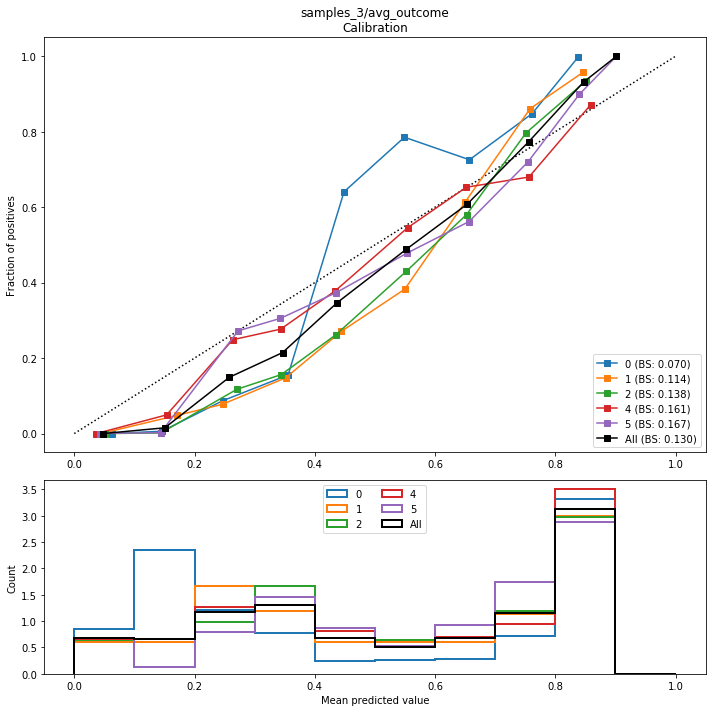

noWS


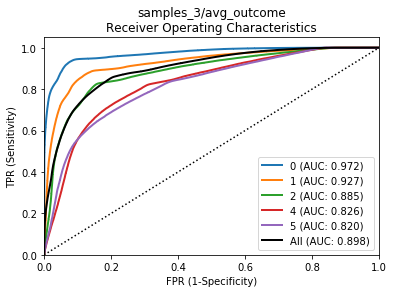

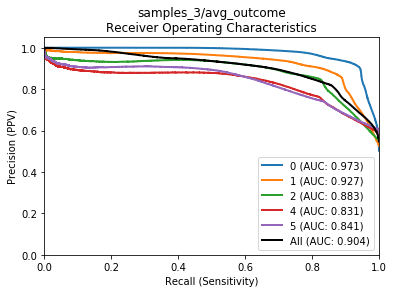

samples_3/avg_outcome (0)
	Brier: 0.081
	Precision: 0.921
	Recall: 0.926
	F1: 0.923

samples_3/avg_outcome (1)
	Brier: 0.111
	Precision: 0.879
	Recall: 0.864
	F1: 0.871

samples_3/avg_outcome (2)
	Brier: 0.137
	Precision: 0.858
	Recall: 0.803
	F1: 0.829

samples_3/avg_outcome (4)
	Brier: 0.171
	Precision: 0.773
	Recall: 0.796
	F1: 0.785

samples_3/avg_outcome (5)
	Brier: 0.175
	Precision: 0.750
	Recall: 0.812
	F1: 0.780

samples_3/avg_outcome (All)
	Brier: 0.135
	Precision: 0.830
	Recall: 0.838
	F1: 0.834



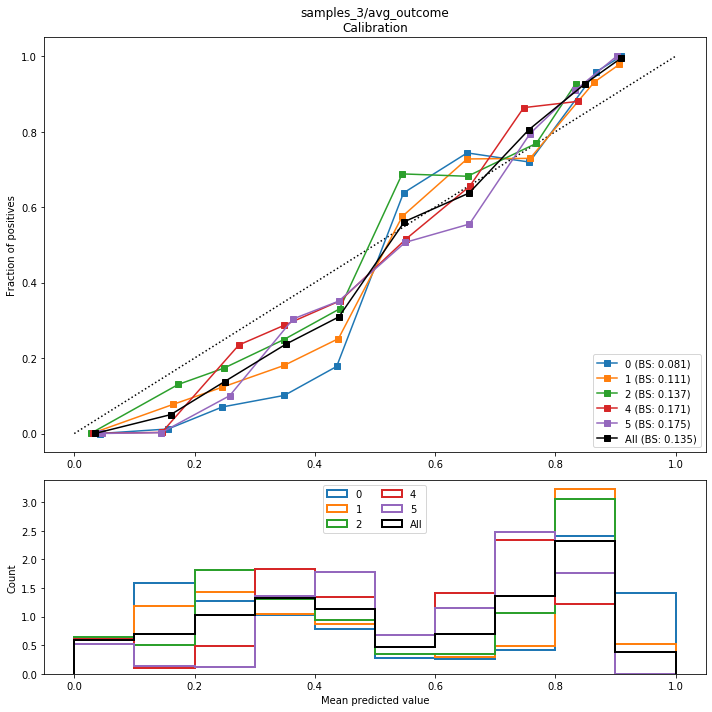

In [17]:
for model_name, model in models.items():
    print(model_name)
    pop_res["train"][model_name].roc_curves()
    pop_res["train"][model_name].pr_curves()
    pop_res["train"][model_name].calibration_curves()
    plt.show()

# Dev

all


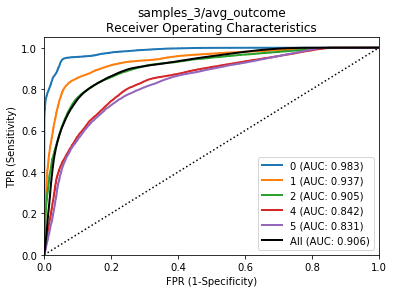

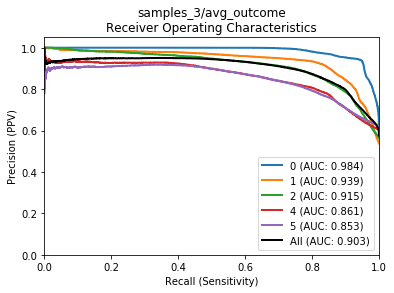

samples_3/avg_outcome (0)
	Brier: 0.069
	Precision: 0.949
	Recall: 0.917
	F1: 0.933

samples_3/avg_outcome (1)
	Brier: 0.114
	Precision: 0.840
	Recall: 0.903
	F1: 0.871

samples_3/avg_outcome (2)
	Brier: 0.137
	Precision: 0.800
	Recall: 0.886
	F1: 0.841

samples_3/avg_outcome (4)
	Brier: 0.159
	Precision: 0.796
	Recall: 0.817
	F1: 0.806

samples_3/avg_outcome (5)
	Brier: 0.165
	Precision: 0.772
	Recall: 0.830
	F1: 0.800

samples_3/avg_outcome (All)
	Brier: 0.129
	Precision: 0.826
	Recall: 0.868
	F1: 0.846



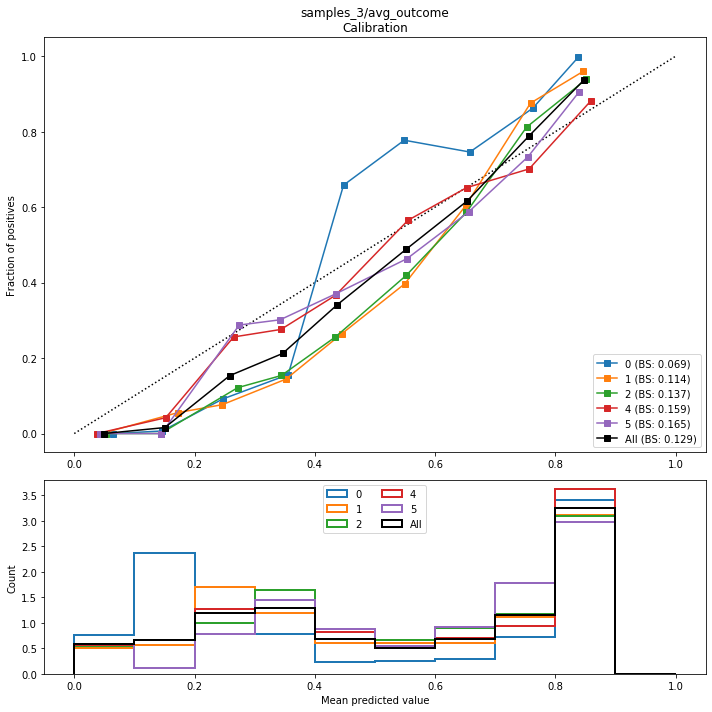

noWS


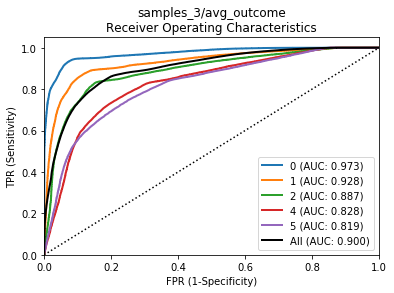

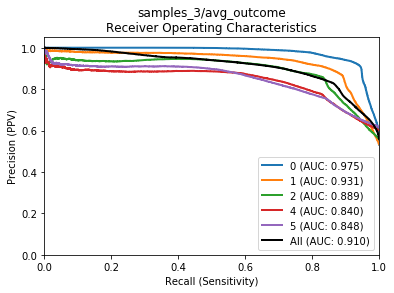

samples_3/avg_outcome (0)
	Brier: 0.080
	Precision: 0.927
	Recall: 0.928
	F1: 0.927

samples_3/avg_outcome (1)
	Brier: 0.109
	Precision: 0.887
	Recall: 0.867
	F1: 0.877

samples_3/avg_outcome (2)
	Brier: 0.136
	Precision: 0.869
	Recall: 0.809
	F1: 0.838

samples_3/avg_outcome (4)
	Brier: 0.169
	Precision: 0.787
	Recall: 0.804
	F1: 0.796

samples_3/avg_outcome (5)
	Brier: 0.173
	Precision: 0.765
	Recall: 0.820
	F1: 0.792

samples_3/avg_outcome (All)
	Brier: 0.133
	Precision: 0.841
	Recall: 0.843
	F1: 0.842



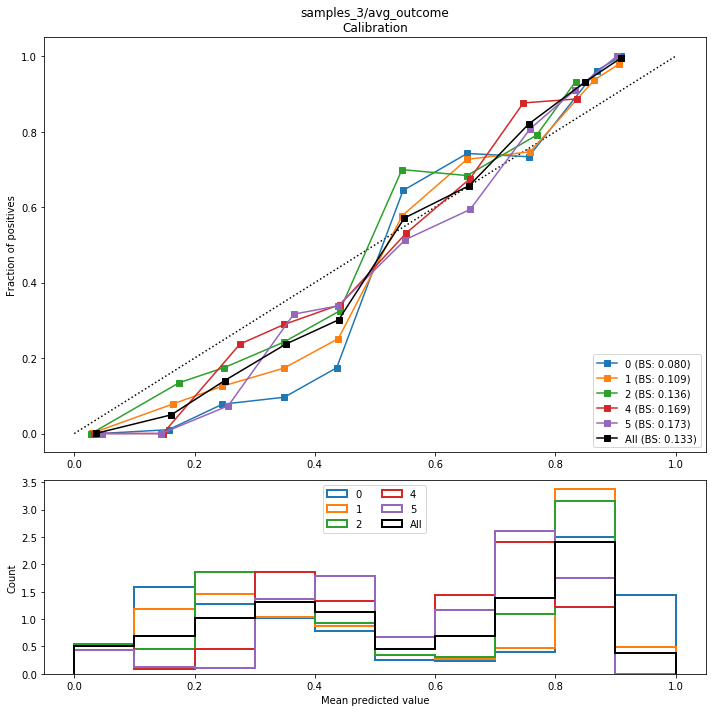

In [18]:
for model_name, model in models.items():
    print(model_name)
    pop_res["dev"][model_name].roc_curves()
    pop_res["dev"][model_name].pr_curves()
    pop_res["dev"][model_name].calibration_curves()
    plt.show()

# Test

all


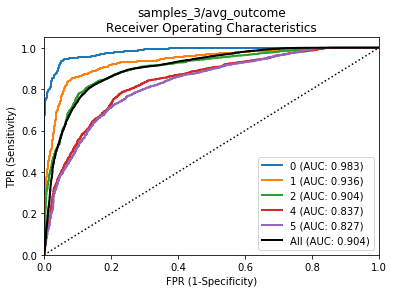

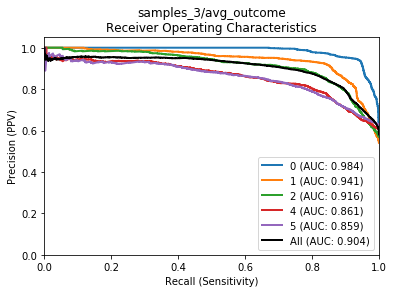

samples_3/avg_outcome (0)
	Brier: 0.069
	Precision: 0.949
	Recall: 0.918
	F1: 0.933

samples_3/avg_outcome (1)
	Brier: 0.113
	Precision: 0.848
	Recall: 0.900
	F1: 0.873

samples_3/avg_outcome (2)
	Brier: 0.136
	Precision: 0.811
	Recall: 0.882
	F1: 0.845

samples_3/avg_outcome (4)
	Brier: 0.161
	Precision: 0.798
	Recall: 0.805
	F1: 0.801

samples_3/avg_outcome (5)
	Brier: 0.166
	Precision: 0.775
	Recall: 0.818
	F1: 0.796

samples_3/avg_outcome (All)
	Brier: 0.129
	Precision: 0.831
	Recall: 0.862
	F1: 0.846



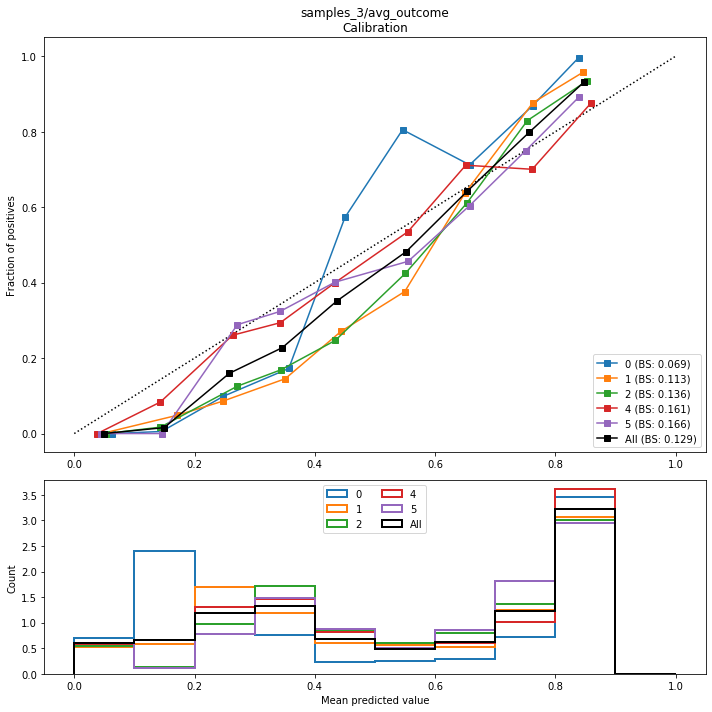

noWS


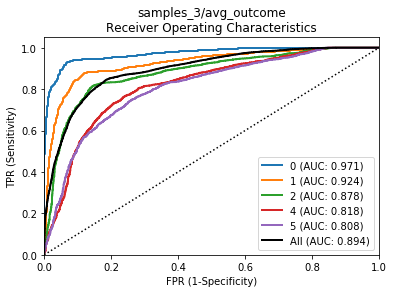

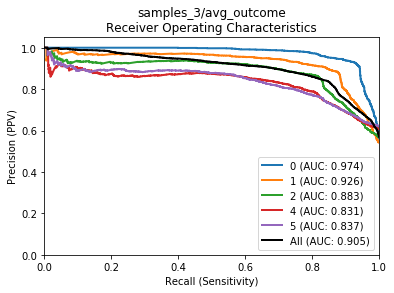

samples_3/avg_outcome (0)
	Brier: 0.080
	Precision: 0.931
	Recall: 0.925
	F1: 0.928

samples_3/avg_outcome (1)
	Brier: 0.110
	Precision: 0.888
	Recall: 0.864
	F1: 0.876

samples_3/avg_outcome (2)
	Brier: 0.139
	Precision: 0.870
	Recall: 0.799
	F1: 0.833

samples_3/avg_outcome (4)
	Brier: 0.172
	Precision: 0.792
	Recall: 0.789
	F1: 0.791

samples_3/avg_outcome (5)
	Brier: 0.175
	Precision: 0.770
	Recall: 0.804
	F1: 0.786

samples_3/avg_outcome (All)
	Brier: 0.135
	Precision: 0.845
	Recall: 0.833
	F1: 0.839



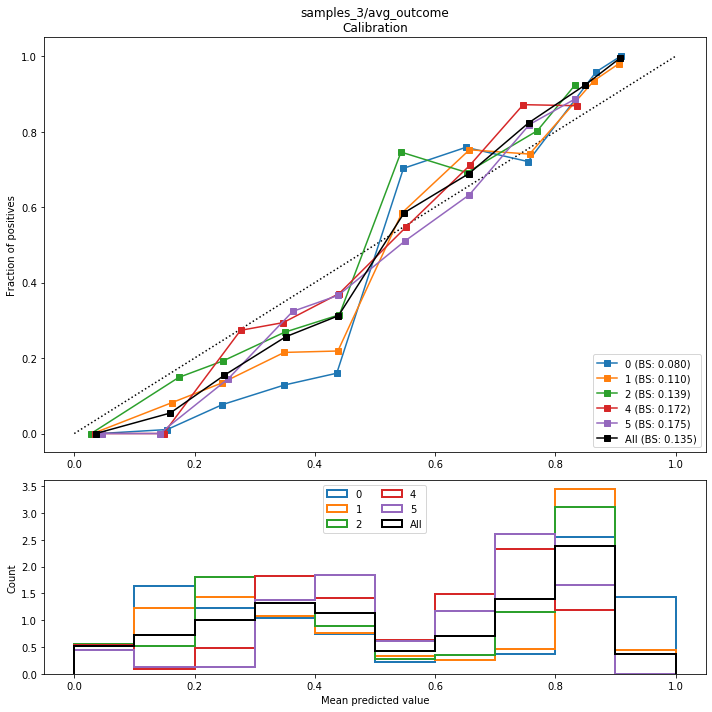

In [19]:
for model_name, model in models.items():
    print(model_name)
    pop_res["test"][model_name].roc_curves()
    pop_res["test"][model_name].pr_curves()
    pop_res["test"][model_name].calibration_curves()
    plt.show()

# Examine Individual Trajectories

00001: samples_3/avg_outcome
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 1.]
[0.] [0. 0. 0. 1. 1.]
[0.] [0. 0. 0. 1. 1.]
[0.] [0. 0. 1. 1. 1.]
[0.] [0. 1. 1. 1. 1.]
[1.] [1. 1. 1. 1. 1.]
[1.] [1. 1. 1. 1. 1.]
[1.] [1. 1. 1. 1. 1.]
[1.] [1. 1. 1. 1. 0.]
[1.] [1. 1. 1. 0. 0.]
[1.] [1. 1. 1. 0. 0.]
[1.] [1. 1. 0. 0. 0.]
[1.] [1. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]
[0.] [0. 0. 0. 0. 0.]



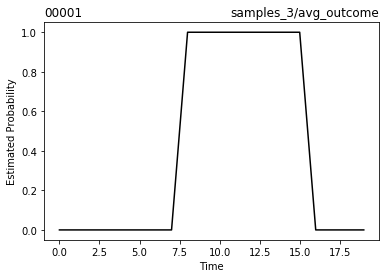

00001: samples_3/avg_outcome
[0.] [0. 0. 0. 0. 0.] [0.38 0.39 0.4  0.41 0.41]
[0.] [0. 0. 0. 0. 0.] [0.28 0.32 0.35 0.35 0.36]
[0.] [0. 0. 0. 0. 0.] [0.2  0.26 0.29 0.29 0.32]
[0.] [0. 0. 0. 0. 1.] [0.15 0.22 0.26 0.25 0.29]
[0.] [0. 0. 0. 1. 1.] [0.12 0.19 0.24 0.24 0.28]
[0.] [0. 0. 0. 1. 1.] [0.1  0.18 0.24 0.23 0.28]
[0.] [0. 0. 1. 1. 1.] [0.1  0.2  0.27 0.25 0.33]
[0.] [0. 1. 1. 1. 1.] [0.1  0.21 0.29 0.27 0.36]
[1.] [1. 1. 1. 1. 1.] [0.28 0.4  0.46 0.5  0.61]
[1.] [1. 1. 1. 1. 1.] [0.55 0.62 0.68 0.74 0.78]
[1.] [1. 1. 1. 1. 1.] [0.74 0.77 0.8  0.84 0.83]
[1.] [1. 1. 1. 1. 0.] [0.82 0.82 0.83 0.87 0.83]
[1.] [1. 1. 1. 0. 0.] [0.85 0.84 0.84 0.87 0.82]
[1.] [1. 1. 1. 0. 0.] [0.85 0.84 0.84 0.86 0.8 ]
[1.] [1. 1. 0. 0. 0.] [0.85 0.83 0.83 0.86 0.79]
[1.] [1. 0. 0. 0. 0.] [0.86 0.84 0.83 0.86 0.79]
[0.] [0. 0. 0. 0. 0.] [0.77 0.78 0.74 0.77 0.65]
[0.] [0. 0. 0. 0. 0.] [0.49 0.52 0.44 0.45 0.33]
[0.] [0. 0. 0. 0. 0.] [0.22 0.22 0.18 0.17 0.12]
[0.] [0. 0. 0. 0. 0.] [0.11 0.09 0.09 0.

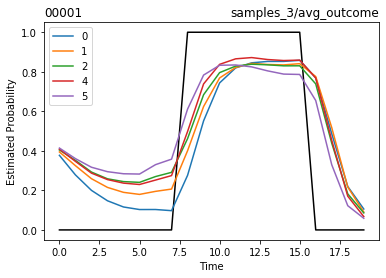

In [20]:
e = Prepper.entity("00001", tfp)
e.print_labels()
e.plot()
e.predict(models["all"])
e.print_labels()
e.plot()

# Additional Feature Development

all


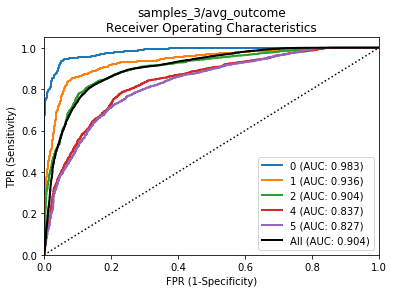

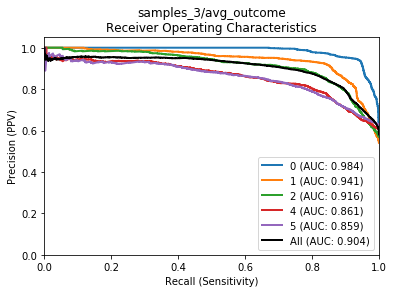

samples_3/avg_outcome (0)
	Brier: 0.069
	Precision: 0.949
	Recall: 0.918
	F1: 0.933

samples_3/avg_outcome (1)
	Brier: 0.113
	Precision: 0.848
	Recall: 0.900
	F1: 0.873

samples_3/avg_outcome (2)
	Brier: 0.136
	Precision: 0.811
	Recall: 0.882
	F1: 0.845

samples_3/avg_outcome (4)
	Brier: 0.161
	Precision: 0.798
	Recall: 0.805
	F1: 0.801

samples_3/avg_outcome (5)
	Brier: 0.166
	Precision: 0.775
	Recall: 0.818
	F1: 0.796

samples_3/avg_outcome (All)
	Brier: 0.129
	Precision: 0.831
	Recall: 0.862
	F1: 0.846



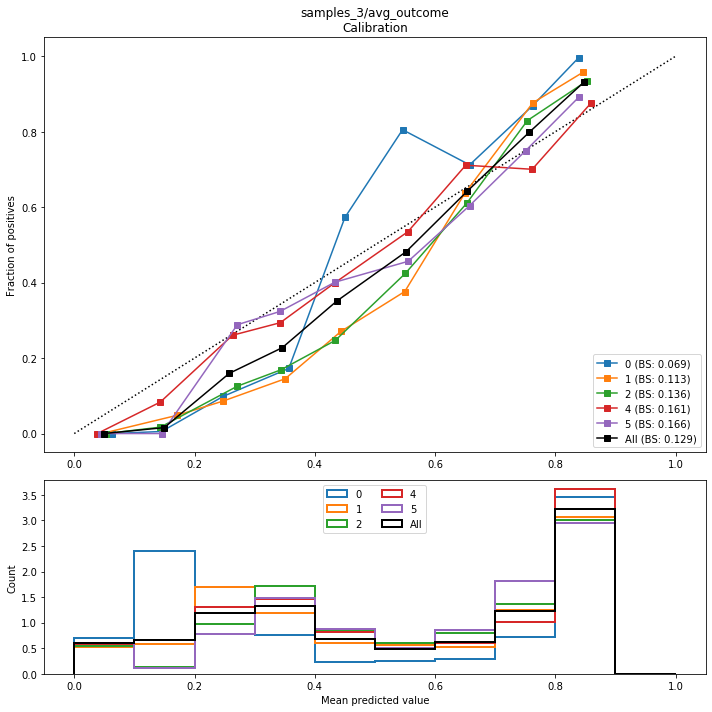

noWS


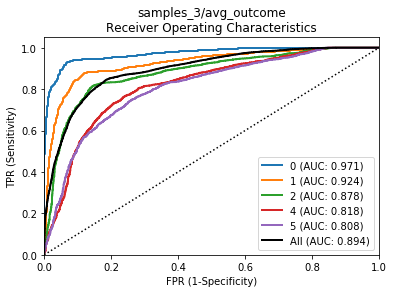

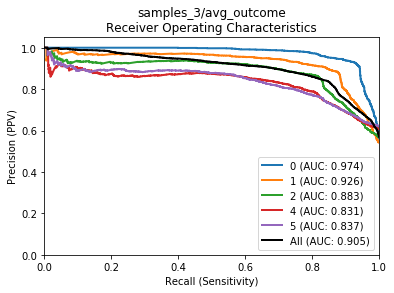

samples_3/avg_outcome (0)
	Brier: 0.080
	Precision: 0.931
	Recall: 0.925
	F1: 0.928

samples_3/avg_outcome (1)
	Brier: 0.110
	Precision: 0.888
	Recall: 0.864
	F1: 0.876

samples_3/avg_outcome (2)
	Brier: 0.139
	Precision: 0.870
	Recall: 0.799
	F1: 0.833

samples_3/avg_outcome (4)
	Brier: 0.172
	Precision: 0.792
	Recall: 0.789
	F1: 0.791

samples_3/avg_outcome (5)
	Brier: 0.175
	Precision: 0.770
	Recall: 0.804
	F1: 0.786

samples_3/avg_outcome (All)
	Brier: 0.135
	Precision: 0.845
	Recall: 0.833
	F1: 0.839



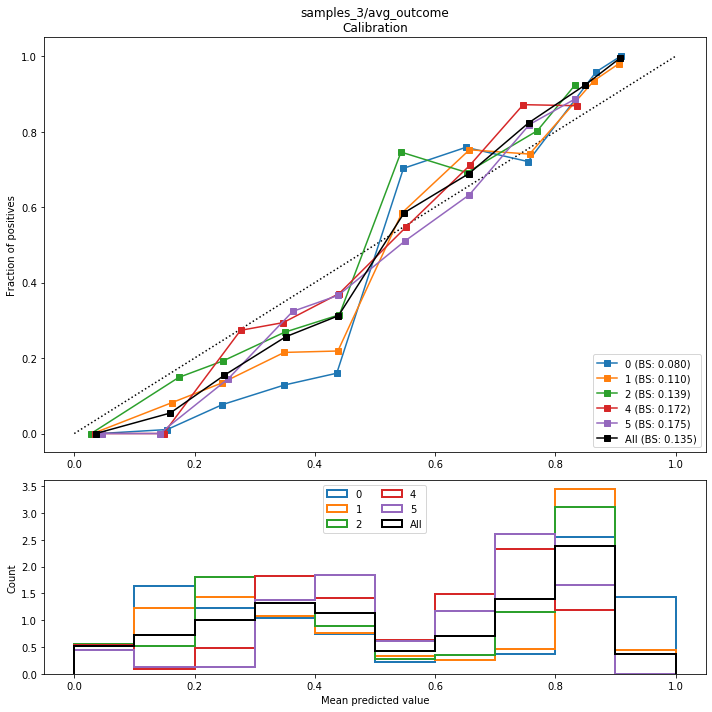

In [21]:
for model_name, model in models.items():
    print(model_name)
    pop_res["test"][model_name].roc_curves()
    pop_res["test"][model_name].pr_curves()
    pop_res["test"][model_name].calibration_curves()
    plt.show()

all


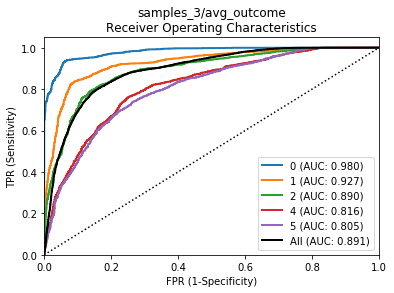

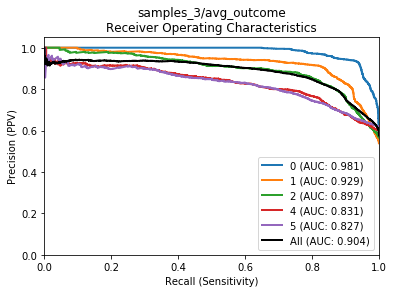

samples_3/avg_outcome (0)
	Brier: 0.073
	Precision: 0.941
	Recall: 0.911
	F1: 0.926

samples_3/avg_outcome (1)
	Brier: 0.117
	Precision: 0.843
	Recall: 0.887
	F1: 0.864

samples_3/avg_outcome (2)
	Brier: 0.141
	Precision: 0.803
	Recall: 0.866
	F1: 0.833

samples_3/avg_outcome (4)
	Brier: 0.172
	Precision: 0.774
	Recall: 0.782
	F1: 0.778

samples_3/avg_outcome (5)
	Brier: 0.177
	Precision: 0.749
	Recall: 0.793
	F1: 0.771

samples_3/avg_outcome (All)
	Brier: 0.136
	Precision: 0.816
	Recall: 0.845
	F1: 0.831



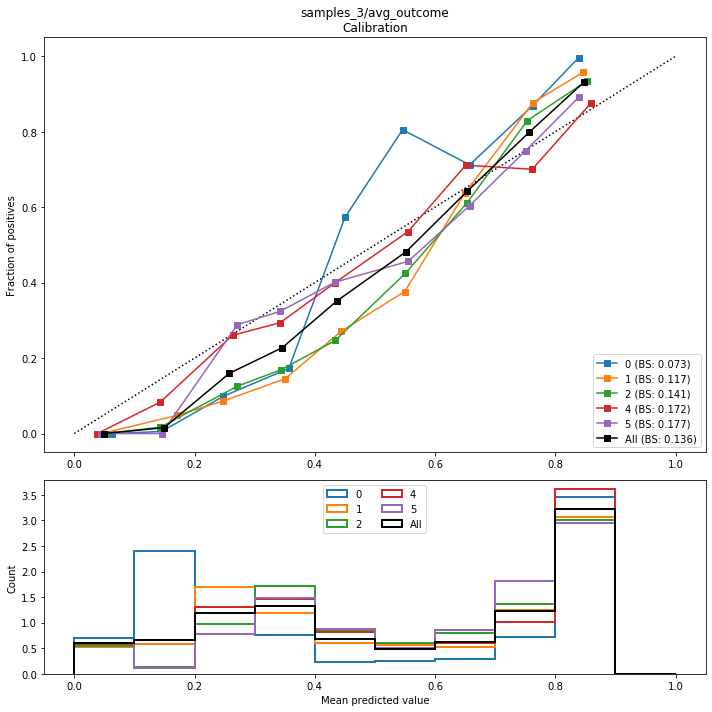

noWS


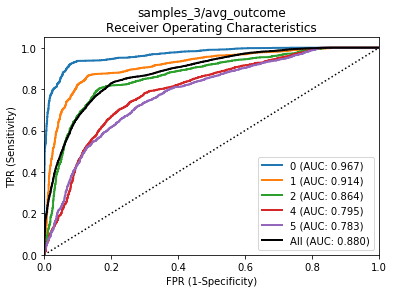

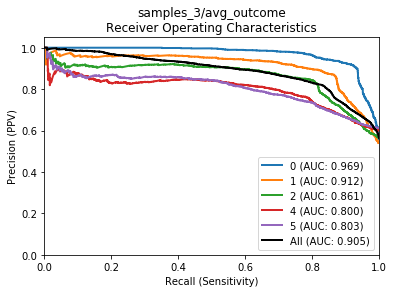

samples_3/avg_outcome (0)
	Brier: 0.085
	Precision: 0.919
	Recall: 0.917
	F1: 0.918

samples_3/avg_outcome (1)
	Brier: 0.117
	Precision: 0.873
	Recall: 0.852
	F1: 0.863

samples_3/avg_outcome (2)
	Brier: 0.147
	Precision: 0.848
	Recall: 0.784
	F1: 0.815

samples_3/avg_outcome (4)
	Brier: 0.181
	Precision: 0.767
	Recall: 0.763
	F1: 0.765

samples_3/avg_outcome (5)
	Brier: 0.185
	Precision: 0.742
	Recall: 0.777
	F1: 0.759

samples_3/avg_outcome (All)
	Brier: 0.143
	Precision: 0.825
	Recall: 0.816
	F1: 0.820



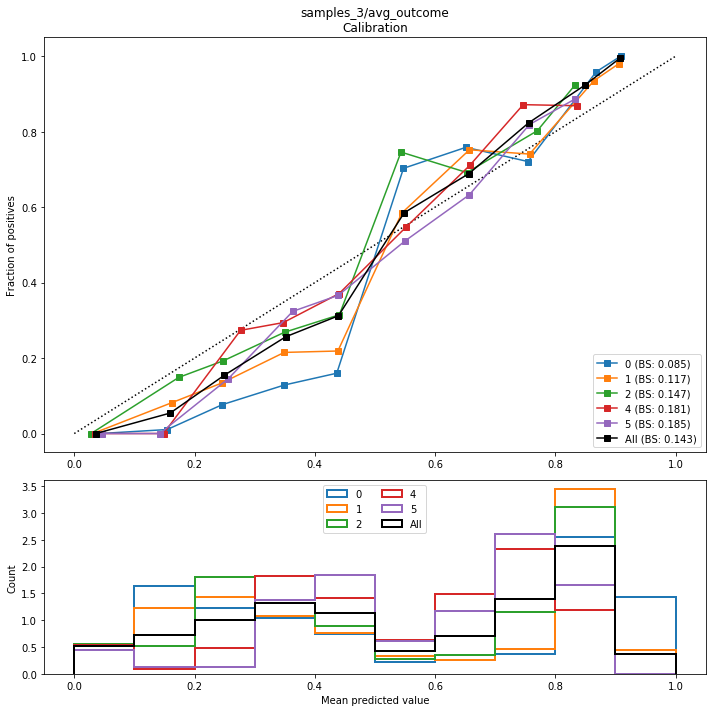

In [22]:
for model_name, model in models.items():
    print(model_name)
    pop_res["test"][model_name].calc_weights(lambda x: 1/x)
    pop_res["test"][model_name].roc_curves()
    pop_res["test"][model_name].pr_curves()
    pop_res["test"][model_name].calibration_curves()
    plt.show()

all


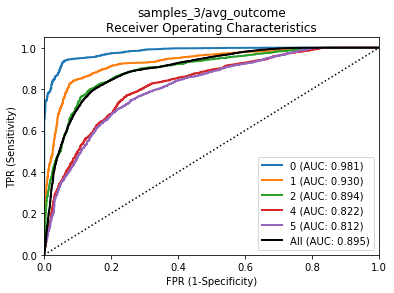

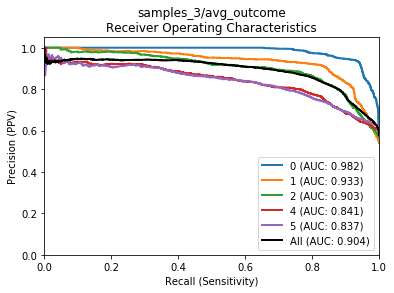

samples_3/avg_outcome (0)
	Brier: 0.072
	Precision: 0.944
	Recall: 0.913
	F1: 0.928

samples_3/avg_outcome (1)
	Brier: 0.116
	Precision: 0.844
	Recall: 0.891
	F1: 0.867

samples_3/avg_outcome (2)
	Brier: 0.140
	Precision: 0.805
	Recall: 0.871
	F1: 0.837

samples_3/avg_outcome (4)
	Brier: 0.169
	Precision: 0.781
	Recall: 0.789
	F1: 0.785

samples_3/avg_outcome (5)
	Brier: 0.173
	Precision: 0.757
	Recall: 0.801
	F1: 0.778

samples_3/avg_outcome (All)
	Brier: 0.134
	Precision: 0.821
	Recall: 0.850
	F1: 0.835



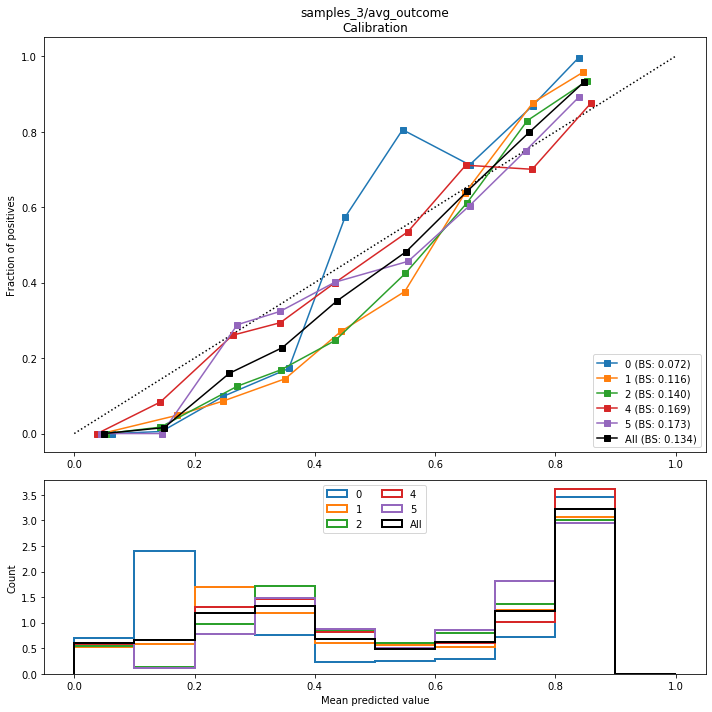

noWS


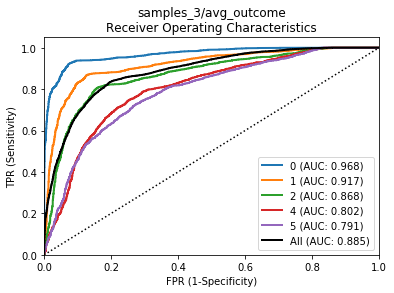

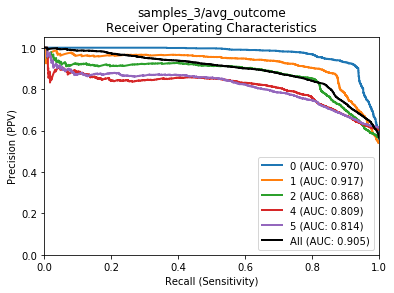

samples_3/avg_outcome (0)
	Brier: 0.083
	Precision: 0.923
	Recall: 0.919
	F1: 0.921

samples_3/avg_outcome (1)
	Brier: 0.115
	Precision: 0.878
	Recall: 0.856
	F1: 0.867

samples_3/avg_outcome (2)
	Brier: 0.144
	Precision: 0.855
	Recall: 0.789
	F1: 0.821

samples_3/avg_outcome (4)
	Brier: 0.178
	Precision: 0.775
	Recall: 0.771
	F1: 0.773

samples_3/avg_outcome (5)
	Brier: 0.182
	Precision: 0.750
	Recall: 0.785
	F1: 0.767

samples_3/avg_outcome (All)
	Brier: 0.141
	Precision: 0.831
	Recall: 0.821
	F1: 0.826



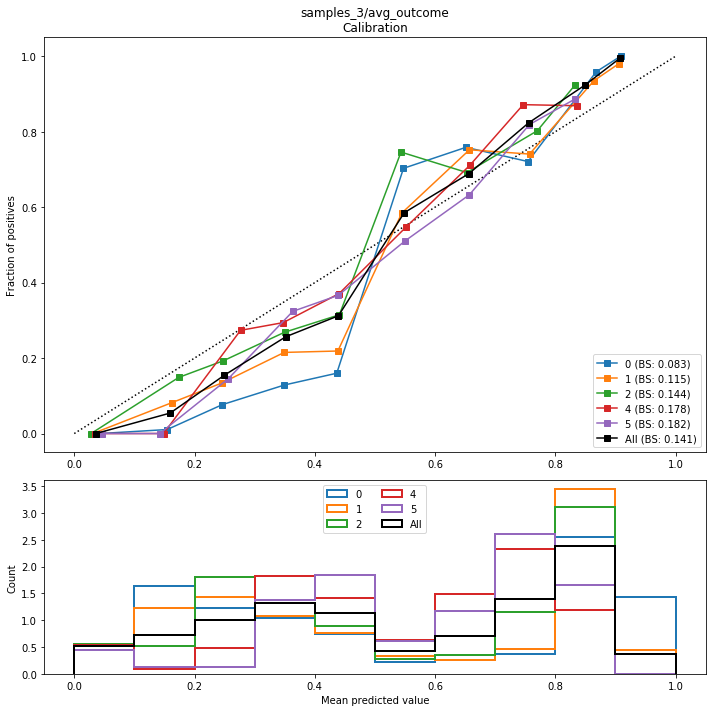

In [23]:
for model_name, model in models.items():
    print(model_name)
    pop_res["test"][model_name].calc_weights(lambda x: math.log(x)/x)
    pop_res["test"][model_name].roc_curves()
    pop_res["test"][model_name].pr_curves()
    pop_res["test"][model_name].calibration_curves()
    plt.show()

In [24]:
len(pop_res["test"]["all"].pred["samples_3/avg_outcome"][0])

4587

In [25]:
len(pop_res["test"]["all"].weights["samples_3/avg_outcome"][0])

4587

In [26]:
idx="00000"
s_X, s_Y = tfp.get_specific_XY(idx)

In [27]:
s_Y_h = models["all"].predict(s_X)

for i, lb in enumerate(tfp.label_fns):
    print(s_Y_h[i].shape, s_Y[lb].shape)

(20, 5) (5, 20, 1)


In [28]:
np.set_printoptions(precision=3)
for fn, v in s_X.items():
    print(fn, "\n", np.squeeze(np.array(v)))

i_id 
 [b'00000' b'00000' b'00000' b'00000' b'00000' b'00000' b'00000' b'00000'
 b'00000' b'00000' b'00000' b'00000' b'00000' b'00000' b'00000' b'00000'
 b'00000' b'00000' b'00000' b'00000']
i_duration 
 [20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20]
characteristics_0/age 
 [0.299 0.299 0.299 0.299 0.299 0.299 0.299 0.299 0.299 0.299 0.299 0.299
 0.299 0.299 0.299 0.299 0.299 0.299 0.299 0.299]
characteristics_0/sex 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
characteristics_0/eth_e0 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
characteristics_0/eth_e1 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
characteristics_0/eth_e2 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
characteristics_0/eth_e3 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
characteristics_0/eth_e4 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
characteristics_0/eth_e5 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [29]:
for i in ds["train"].take(1):
    x, y = i
    for k, v in x.items():
        print(k, '\n', v.shape, '\n')
    
    for i, _y in enumerate(y):
        print("y[%s]" %(i), '\n', _y.shape, '\n')

print("Avg y value: ", tf.reduce_mean(y).numpy())

i_id 
 (64, 40, 1) 

i_duration 
 (64, 40, 1) 

characteristics_0/age 
 (64, 40, 1) 

characteristics_0/sex 
 (64, 40, 1) 

characteristics_0/eth_e0 
 (64, 40, 1) 

characteristics_0/eth_e1 
 (64, 40, 1) 

characteristics_0/eth_e2 
 (64, 40, 1) 

characteristics_0/eth_e3 
 (64, 40, 1) 

characteristics_0/eth_e4 
 (64, 40, 1) 

characteristics_0/eth_e5 
 (64, 40, 1) 

characteristics_0/eth__OTHER_ 
 (64, 40, 1) 

characteristics_0/bin_ldc_A 
 (64, 40, 1) 

characteristics_0/bin_ldc_B 
 (64, 40, 1) 

characteristics_0/bin_ldc__OTHER_ 
 (64, 40, 1) 

characteristics_0/job 
 (64, 40, 1) 

samples_0/avg_SBP 
 (64, 40, 1) 

samples_0/min_SBP 
 (64, 40, 1) 

samples_0/max_SBP 
 (64, 40, 1) 

samples_0/avg_DBP 
 (64, 40, 1) 

samples_0/min_DBP 
 (64, 40, 1) 

samples_0/max_DBP 
 (64, 40, 1) 

samples_0/avg_type_c0 
 (64, 40, 1) 

samples_0/avg_type_c1 
 (64, 40, 1) 

samples_0/avg_type_c2 
 (64, 40, 1) 

samples_0/avg_type_c3 
 (64, 40, 1) 

samples_0/avg_type_c4 
 (64, 40, 1) 

samples_0/avg_